In [1]:
!wget https://hadoop-and-big-data.s3-us-west-2.amazonaws.com/fitness-tracker/health_tracker_data_2020_1.json

--2020-04-08 01:42:15--  https://hadoop-and-big-data.s3-us-west-2.amazonaws.com/fitness-tracker/health_tracker_data_2020_1.json
Resolving hadoop-and-big-data.s3-us-west-2.amazonaws.com (hadoop-and-big-data.s3-us-west-2.amazonaws.com)... 52.218.193.233
Connecting to hadoop-and-big-data.s3-us-west-2.amazonaws.com (hadoop-and-big-data.s3-us-west-2.amazonaws.com)|52.218.193.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310630 (303K) [application/json]
Saving to: ‘health_tracker_data_2020_1.json’

health_tracker_data 100%[===================>] 303.35K  1.45MB/s    in 0.2s    

2020-04-08 01:42:16 (1.45 MB/s) - ‘health_tracker_data_2020_1.json’ saved [310630/310630]



In [2]:
!wget https://hadoop-and-big-data.s3-us-west-2.amazonaws.com/fitness-tracker/health_tracker_data_2020_2.json

--2020-04-08 01:42:17--  https://hadoop-and-big-data.s3-us-west-2.amazonaws.com/fitness-tracker/health_tracker_data_2020_2.json
Resolving hadoop-and-big-data.s3-us-west-2.amazonaws.com (hadoop-and-big-data.s3-us-west-2.amazonaws.com)... 52.218.193.233
Connecting to hadoop-and-big-data.s3-us-west-2.amazonaws.com (hadoop-and-big-data.s3-us-west-2.amazonaws.com)|52.218.193.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284671 (278K) [application/json]
Saving to: ‘health_tracker_data_2020_2.json’

health_tracker_data 100%[===================>] 278.00K  1.33MB/s    in 0.2s    

2020-04-08 01:42:17 (1.33 MB/s) - ‘health_tracker_data_2020_2.json’ saved [284671/284671]



In [3]:
!wget https://hadoop-and-big-data.s3-us-west-2.amazonaws.com/fitness-tracker/health_tracker_data_2020_2_late.json

--2020-04-08 01:42:18--  https://hadoop-and-big-data.s3-us-west-2.amazonaws.com/fitness-tracker/health_tracker_data_2020_2_late.json
Resolving hadoop-and-big-data.s3-us-west-2.amazonaws.com (hadoop-and-big-data.s3-us-west-2.amazonaws.com)... 52.218.193.233
Connecting to hadoop-and-big-data.s3-us-west-2.amazonaws.com (hadoop-and-big-data.s3-us-west-2.amazonaws.com)|52.218.193.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5828 (5.7K) [application/json]
Saving to: ‘health_tracker_data_2020_2_late.json’

health_tracker_data 100%[===================>]   5.69K  --.-KB/s    in 0.006s  

2020-04-08 01:42:18 (947 KB/s) - ‘health_tracker_data_2020_2_late.json’ saved [5828/5828]



In [4]:
!rm -rf ../data/health_tracker

In [5]:
!mv health_tracker* ../data/

In [6]:
!ls ../data

health_tracker_data_2020_1.json       nasa_19950630.22-19950728.12.tsv
health_tracker_data_2020_2.json       nasa_19950731.22-19950831.22.tsv
health_tracker_data_2020_2_late.json  NASA-top-10
NASA


In [7]:
from os import environ
environ['PYSPARK_SUBMIT_ARGS'] = '--packages "io.delta:delta-core_2.11:0.5.0" pyspark-shell'

from pyspark import sql

spark = sql.SparkSession.builder \
        .master("local[8]") \
        .getOrCreate()


In [8]:
spark.read.json("../data/health_tracker_data_2020_1.json").printSchema()

root
 |-- device_id: long (nullable = true)
 |-- heartrate: double (nullable = true)
 |-- name: string (nullable = true)
 |-- time: double (nullable = true)



In [9]:
january_data = "../data/health_tracker_data_2020_1.json"
health_tracker_data_2020_1_spark_df = spark.read.json(january_data)

In [10]:
health_tracker_data_2020_1_spark_df.describe().show()

+-------+------------------+-----------------+--------------+-----------------+
|summary|         device_id|        heartrate|          name|             time|
+-------+------------------+-----------------+--------------+-----------------+
|  count|              3720|             3720|          3720|             3720|
|   mean|               2.0|81.06307641375903|          null|      1.5791742E9|
| stddev|1.4144036831728202|32.02158427493751|          null|773290.7260012928|
|    min|                 0|  -214.0260997522|Deborah Powell|      1.5778368E9|
|    max|                 4|   186.4790827731|     Sam Knopp|      1.5805116E9|
+-------+------------------+-----------------+--------------+-----------------+



In [11]:
health_tracker_data_2020_1_pd_df = health_tracker_data_2020_1_spark_df.toPandas()
health_tracker_data_2020_1_pd_df.describe()

,device_id,heartrate,time
count,3720.000000,3720.000000,3.720000e+03
mean,2.000000,81.063076,1.579174e+09
std,1.414404,32.021584,7.732907e+05
min,0.000000,-214.026100,1.577837e+09
25%,1.000000,58.693890,1.578506e+09
50%,2.000000,86.543347,1.579174e+09
75%,3.000000,97.725701,1.579843e+09
max,4.000000,186.479083,1.580512e+09


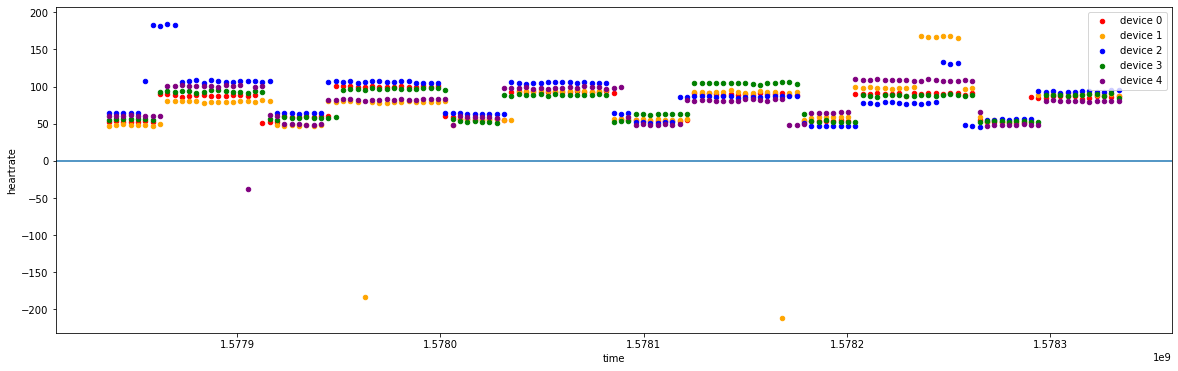

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,6))
colors = ("red", "orange", "blue", "green", "purple")

for _id in health_tracker_data_2020_1_pd_df.device_id.unique():
    mask = ((health_tracker_data_2020_1_pd_df.device_id == _id) &
            (health_tracker_data_2020_1_pd_df.time < 1.578337e+09))
    (health_tracker_data_2020_1_pd_df[mask]
     .plot(kind="scatter", x="time", y="heartrate",
           color=colors[_id], label=f"device {_id}", ax=ax))
ax.axhline(0)

In [13]:
from pyspark.sql.functions import col, from_unixtime

silverDF = health_tracker_data_2020_1_spark_df.withColumn("time", from_unixtime("time"))
silverDF = silverDF.withColumn("time", col("time").cast("timestamp"))
silverDF = silverDF.withColumn("dte", col("time").cast("date"))

silverDF.show()

+---------+-------------+--------------+-------------------+----------+
|device_id|    heartrate|          name|               time|       dte|
+---------+-------------+--------------+-------------------+----------+
|        0|52.8139067501|Deborah Powell|2020-01-01 00:00:00|2020-01-01|
|        0|53.9078900098|Deborah Powell|2020-01-01 01:00:00|2020-01-01|
|        0|52.7129593616|Deborah Powell|2020-01-01 02:00:00|2020-01-01|
|        0|52.2880422685|Deborah Powell|2020-01-01 03:00:00|2020-01-01|
|        0|52.5156095386|Deborah Powell|2020-01-01 04:00:00|2020-01-01|
|        0|53.6280743846|Deborah Powell|2020-01-01 05:00:00|2020-01-01|
|        0|52.1760037066|Deborah Powell|2020-01-01 06:00:00|2020-01-01|
|        0|90.0456721836|Deborah Powell|2020-01-01 07:00:00|2020-01-01|
|        0|89.4695644522|Deborah Powell|2020-01-01 08:00:00|2020-01-01|
|        0|88.1490304138|Deborah Powell|2020-01-01 09:00:00|2020-01-01|
|        0|86.3092976213|Deborah Powell|2020-01-01 10:00:00|2020

In [14]:
silverDF.write \
 .mode("overwrite") \
 .format("parquet") \
 .partitionBy("device_id") \
 .save("../data/health_tracker/silver") 

In [15]:
!ls ../data/health_tracker/silver

'device_id=0'  'device_id=2'  'device_id=4'
'device_id=1'  'device_id=3'   _SUCCESS


In [16]:
spark.read \
    .format("parquet") \
    .load("../data/health_tracker/silver").show()

+-------------+--------------+-------------------+----------+---------+
|    heartrate|          name|               time|       dte|device_id|
+-------------+--------------+-------------------+----------+---------+
|47.5378557652|Kristin Vasser|2020-01-01 00:00:00|2020-01-01|        1|
|48.3496970512|Kristin Vasser|2020-01-01 01:00:00|2020-01-01|        1|
|49.1212033115|Kristin Vasser|2020-01-01 02:00:00|2020-01-01|        1|
|47.9982802854|Kristin Vasser|2020-01-01 03:00:00|2020-01-01|        1|
| 47.841083408|Kristin Vasser|2020-01-01 04:00:00|2020-01-01|        1|
|47.7225468025|Kristin Vasser|2020-01-01 05:00:00|2020-01-01|        1|
|47.3041211781|Kristin Vasser|2020-01-01 06:00:00|2020-01-01|        1|
|49.1694935562|Kristin Vasser|2020-01-01 07:00:00|2020-01-01|        1|
|80.1944436044|Kristin Vasser|2020-01-01 08:00:00|2020-01-01|        1|
|80.0663193135|Kristin Vasser|2020-01-01 09:00:00|2020-01-01|        1|
|80.4780281723|Kristin Vasser|2020-01-01 10:00:00|2020-01-01|   

In [17]:
spark.read \
    .format("parquet") \
    .load("../data/health_tracker/silver").count()

3720

In [18]:
from delta.tables import DeltaTable
health_tracker_parquet_table = "parquet.`../data/health_tracker/silver`"
partition = "device_id int"

delta_table = DeltaTable.convertToDelta(spark, 
                                        health_tracker_parquet_table, 
                                        partition)

In [19]:
spark.read \
    .format("delta") \
    .load("../data/health_tracker/silver").count()

3720